<a href="https://colab.research.google.com/github/tahirp/customer_coupon/blob/main/coupons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [33]:
# --------------------------------------------
# Imports (Syntax & Code Quality rubric check)
# --------------------------------------------
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Global plot style
sns.set(context="notebook", style="whitegrid")
plt.rcParams["figure.figsize"] = (7.5, 4.5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11

# Avoid long auto-printed outputs
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 30)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [34]:
# -------------------------
# 1. Load data from (CSV)
# -------------------------

path = 'data/coupons.csv'
COLS = [
    "destination", "passanger", "weather", "temperature", "time", "coupon", "expiration", "gender", "age",
    "marital_status", "has_children", "education", "occupation", "income", "car", "bar", "coffee_house", "take_away",
    "restaurant_less_20", "restaurant_20_50", "to_coupon_5_min", "to_coupon_15_min",
    "to_coupon_25_min", "same_direction", "opposite_direction", "coupon_accepted"
]

data = pd.read_csv(path, names=COLS, na_values=" ?", skipinitialspace=True, header=0)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital_status,has_children,education,occupation,income,car,bar,coffee_house,take_away,restaurant_less_20,restaurant_20_50,to_coupon_5_min,to_coupon_15_min,to_coupon_25_min,same_direction,opposite_direction,coupon_accepted
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Unique Values of each feature

* `destination`: No Urgent Place, Home, Work
* `passanger`: Alone, Friend(s), Kid(s), Partner
* `weather`: Sunny, 'Rainy, Snowy
* `temperature`: 55, 80, 30
* `time`: '2PM', 10AM, 6PM, AM 10PM
* `coupon`: Restaurant(< 20),  Coffe House, Carry out & Take away,   Bar, Restaurant(20-50)
* `expiration`: 2h, 1d
* `gender`: Female, Male
* `marital_status`: Unmarried partner, Single, Married partner, Divorced, Widowed
* `has_children`: 1, 0
* `education`: Some college - no degree, Bachelors degree,
Associates degree, High School Graduate,
Graduate degree (Masters or Doctorate), Some High School
* `occupation`: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, ...
* `income`: $37500 - $49999, $62500 - $74999, $12500 - $24999,
$75000 - $87499, $50000 - $62499, $25000 - $37499,
$100000 or More, $87500 - $99999, Less than $12500
* `car`: nan, Scooter and motorcycle, crossover, Mazda5,
do not drive, Car that is too old to install Onstar
* `bar`: never, less1, 1~3, gt8, nan, 4~8
* `coffee_house`: never, less1, 4~8, 1~3, gt8, nan
* `take_away`: nan, '4~8', 1~3, 'gt8', less1, never
* `restaurant_less_20`: '4~8', 1~3, less1, gt8, nan, never
* `restaurant_20_50`: 1~3, less1, never, gt8, 4~8, nan
* `to_coupon_5_min`: 1
* `to_coupon_15_min`: 0, 1
* `to_coupon_25_min`: 0, 1
* `same_direction`: 0, 1
* `opposite_direction`: 0, 1
* `coupon_accepted`: 0, 1

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   destination         12684 non-null  object
 1   passanger           12684 non-null  object
 2   weather             12684 non-null  object
 3   temperature         12684 non-null  int64 
 4   time                12684 non-null  object
 5   coupon              12684 non-null  object
 6   expiration          12684 non-null  object
 7   gender              12684 non-null  object
 8   age                 12684 non-null  object
 9   marital_status      12684 non-null  object
 10  has_children        12684 non-null  int64 
 11  education           12684 non-null  object
 12  occupation          12684 non-null  object
 13  income              12684 non-null  object
 14  car                 108 non-null    object
 15  bar                 12577 non-null  object
 16  coffee_house        12

2. Investigate the dataset for missing or problematic data.

In [36]:
#-------------------------------------------------------------------------------
# 2.1: Find missing data
#-------------------------------------------------------------------------------

missing_values = data.isnull().sum()

# Create a DataFrame for missing values with counts and percentages
missing_data_count_percent = pd.DataFrame({
    'Missing Count': missing_values[missing_values > 0],
    'Missing Percentage (%)': ((missing_values[missing_values > 0] / len(data)) * 100).round(2)
})

# Rename the index column
missing_data_count_percent = missing_data_count_percent.rename_axis('Column Name')

# Display information about missing values
missing_data_count_percent


,Missing Count,Missing Percentage (%)
Column Name,,
car,12576,99.15
bar,107,0.84
coffee_house,217,1.71
take_away,151,1.19
restaurant_less_20,130,1.02
restaurant_20_50,189,1.49


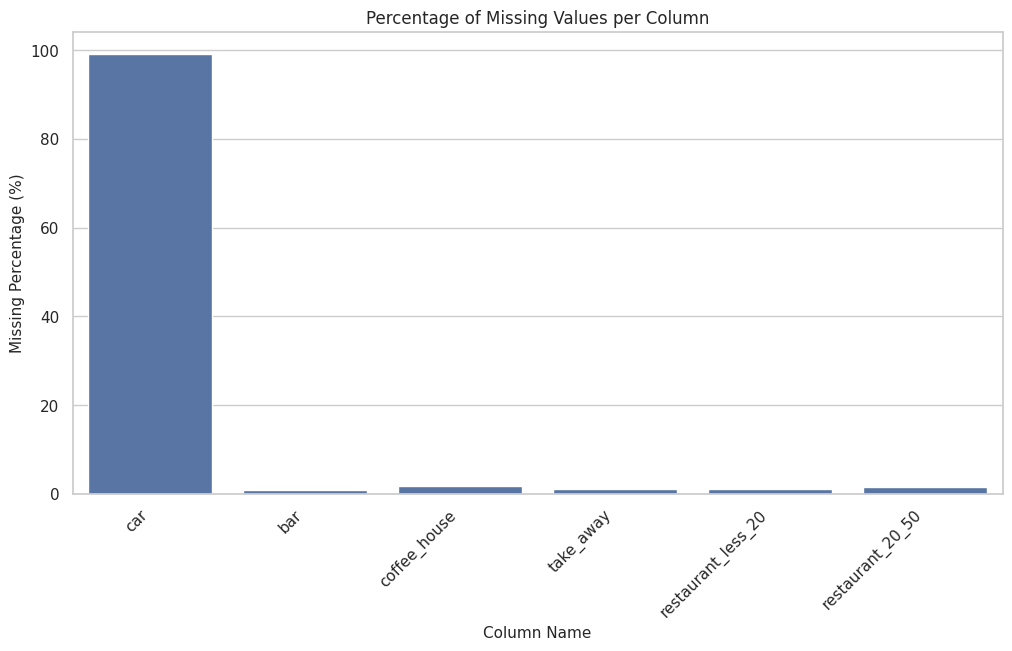

In [37]:
#-------------------------------------------------------------------------------
# 2.1: Missing data plot
#-------------------------------------------------------------------------------

plt.figure(figsize=(12, 6))
sns.barplot(data=missing_data_count_percent, x=missing_data_count_percent.index, y='Missing Percentage (%)')
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Missing Percentage (%)')
plt.xlabel('Column Name')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
#-------------------------------------------------------------------------------
# 2.2: Find problematic data
#-------------------------------------------------------------------------------

data.describe()

,temperature,has_children,to_coupon_5_min,to_coupon_15_min,to_coupon_25_min,same_direction,opposite_direction,coupon_accepted
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Analysis of numeric columns

* `temperature`: Mean is 63%, and median is 80 degree. STD 19% mean weather is towards hot.
* `has_children`: 41% customers are with children. STD of 49% shows the people with and without are evenly distributed.
* `to_coupon_5_min`: is 1 for all. All the customers are within the range of 5 minutes. That's why STD is 0**.
* `to_coupon_15_min`: 56% customer are in the range of 15 minutes. STD 49% shows it is even split between 0 and 1.
* `to_coupon_25_min`: 11% customer are in the range of 25 minutes. Median is 0, and STD is 32% that shows small number of customers in this range.
* `same_direction`: 21% customers are in the same direction. STD is 41% is moderate amount of variation whether the destination is in the same direction or not.
* `opposite_direction`: 78% customers are in the opposite direction. Median and 75% is 1 that represents majority customers.
* `coupon_accepted`: 56% of the customers accepted coupon and STD is 49% that shows the evenly distribution of customers who accepted and did not accepted the coupons. 50% is 1 that aligns with mean value.

`Summary: It seems like the numerical columns are generally within expected ranges based on the .describe() output.`

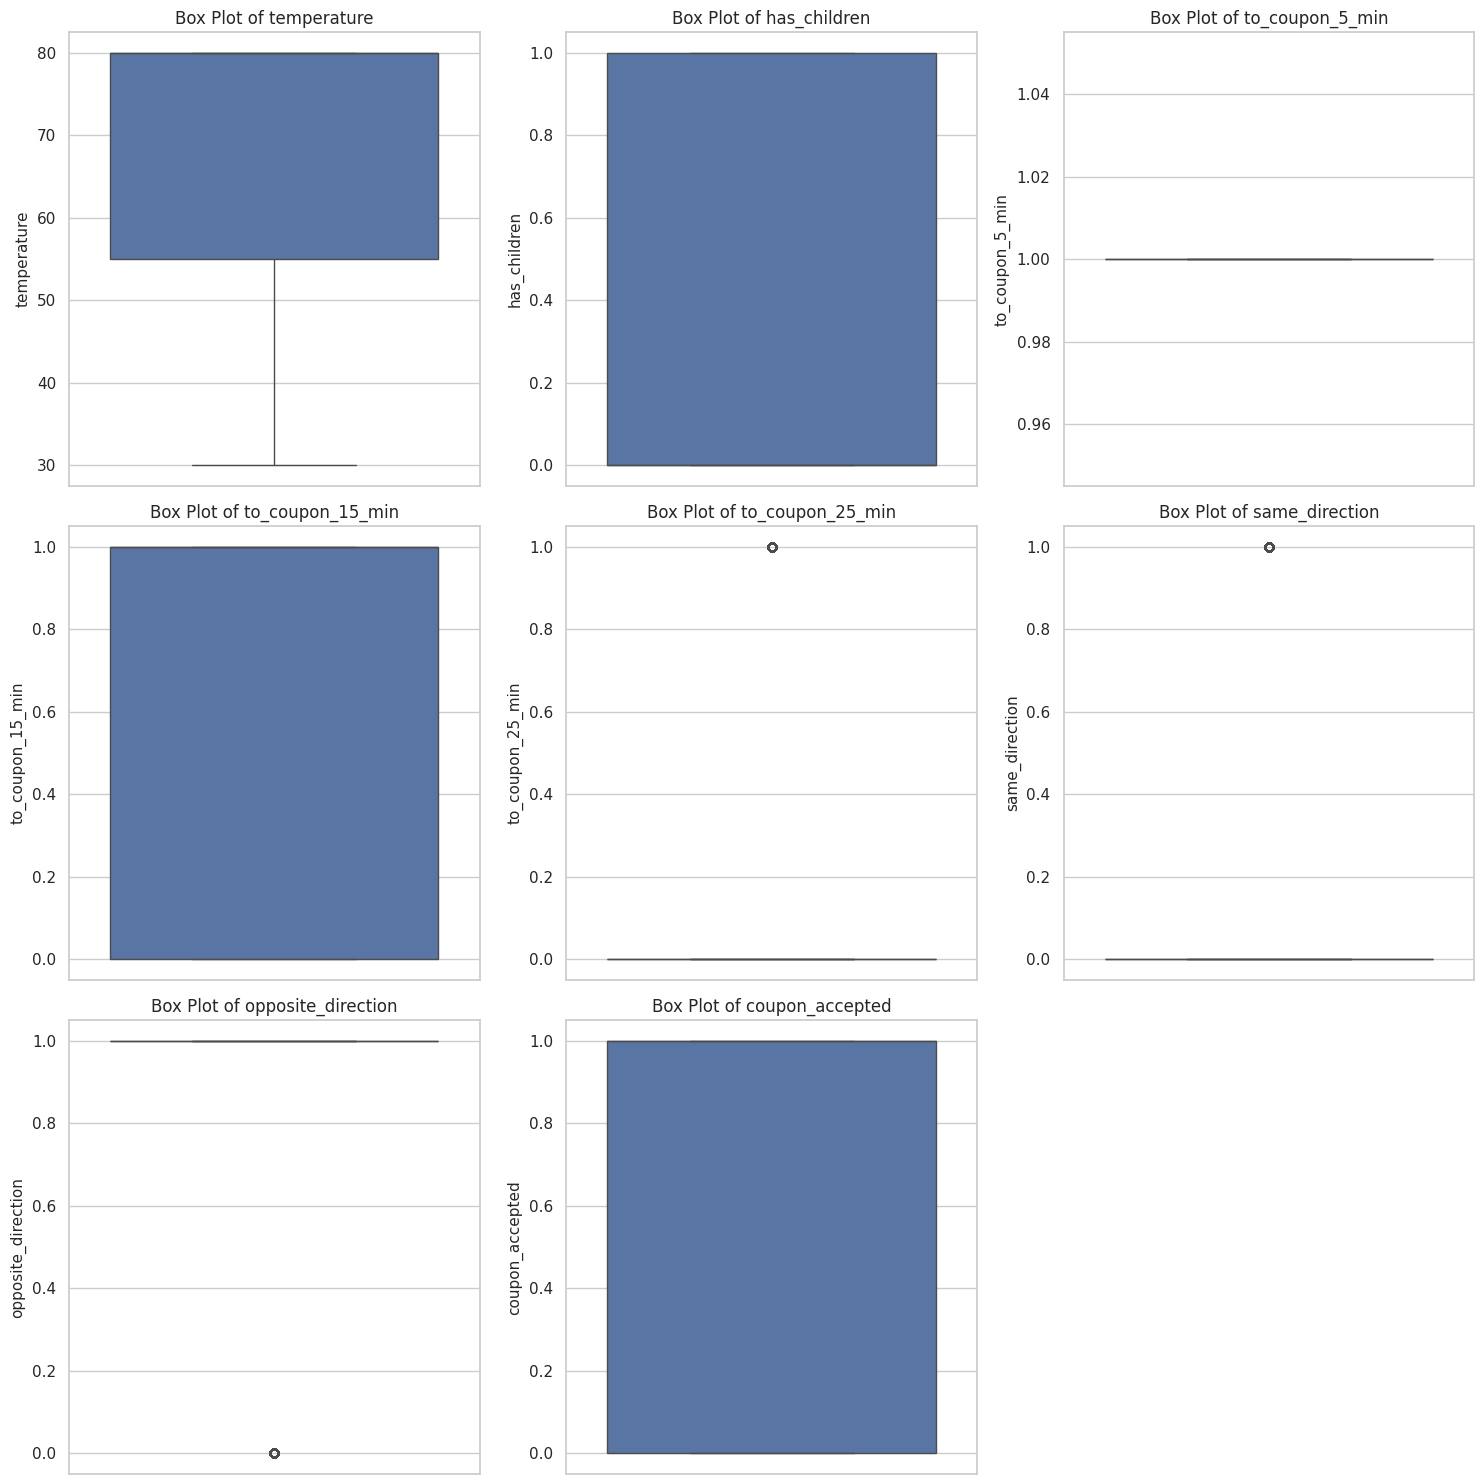

In [39]:
#----------------------------------------------------------------------------------------------------------
# 2.2: Problematic data - Boxplot of numerical columns
#
# The box plots suggest that the numerical columns, have distributions that are
# largely within expected ranges based  on the data description, with no obvious extreme outliers
# that would immediately suggest problematic data points requiring removal or significant transformation.
#----------------------------------------------------------------------------------------------------------

numerical_cols = data.select_dtypes(include=np.number).columns

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

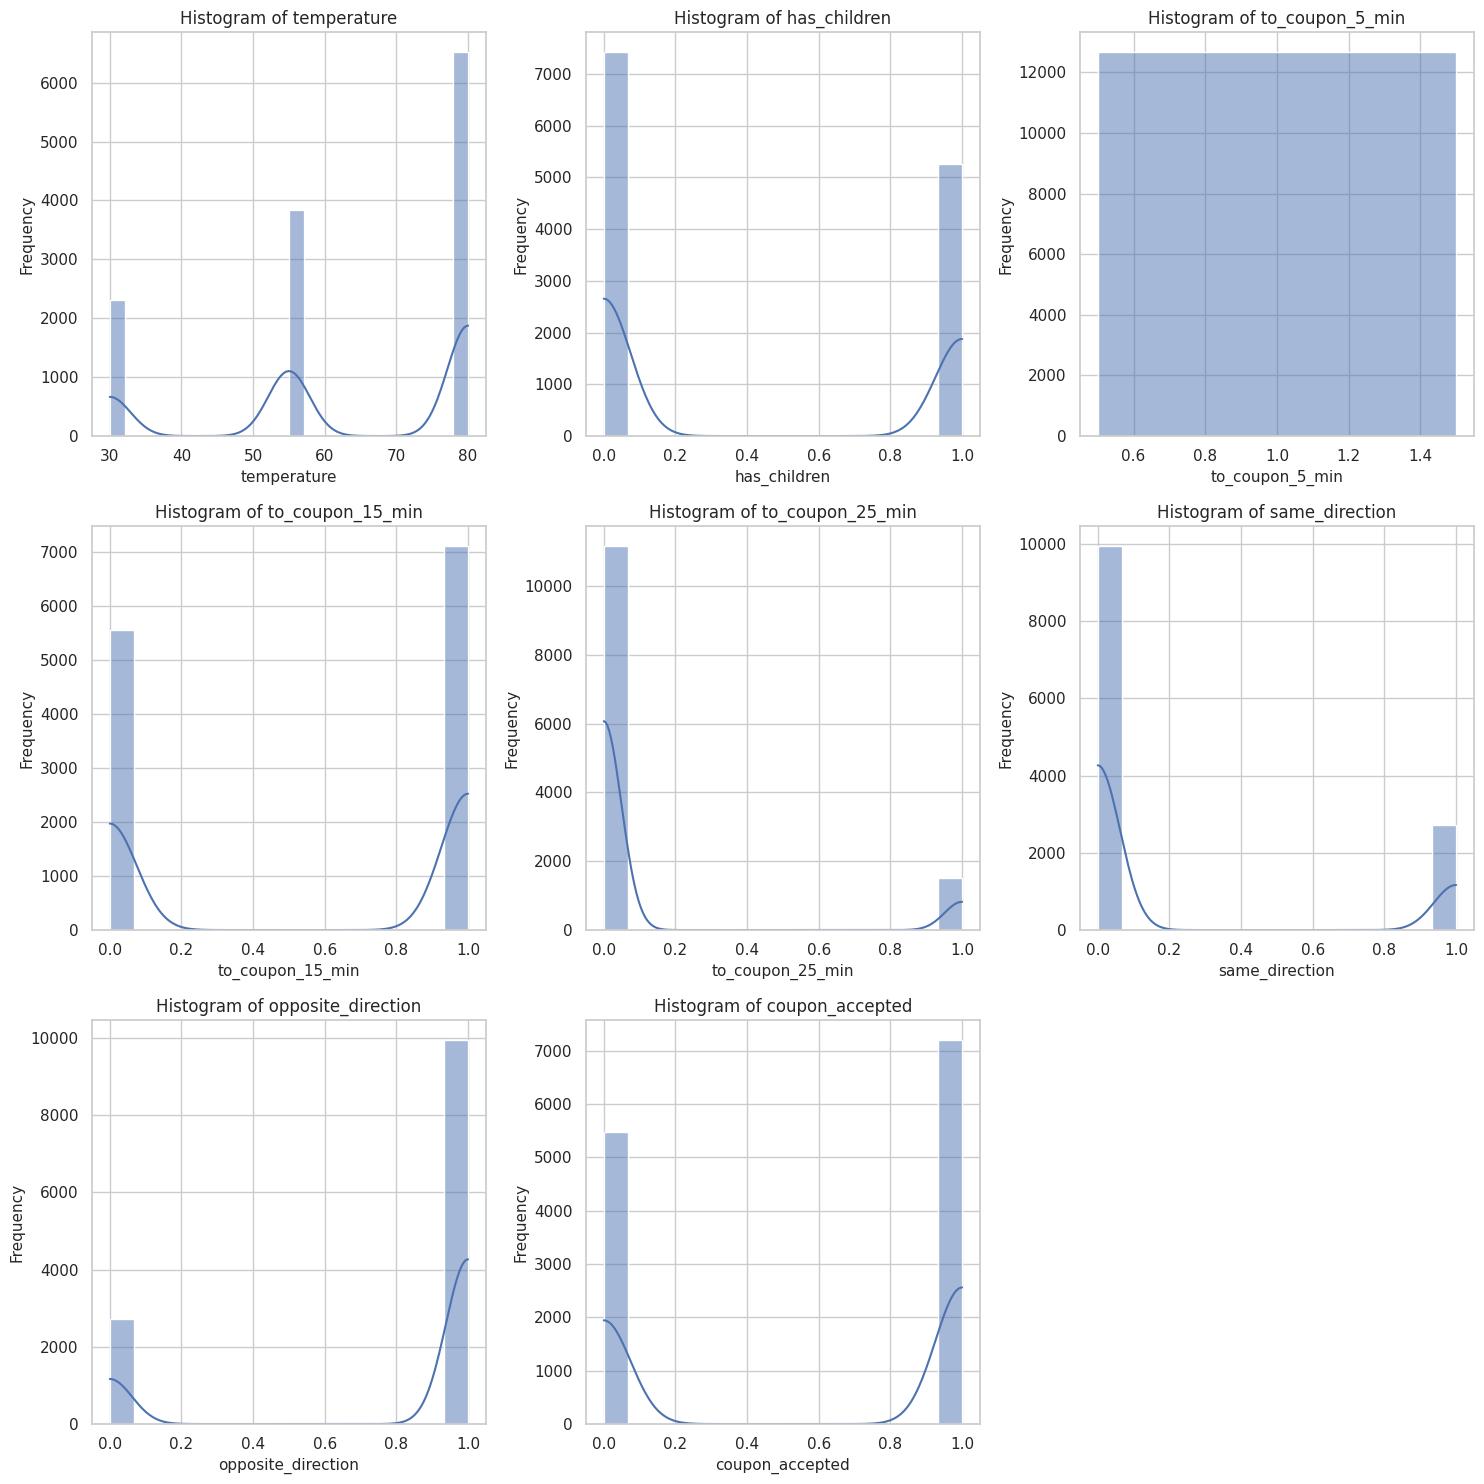

In [40]:
#----------------------------------------------------------------------------------------------------------
# 2.2: Problematic data - Histogram of numerical columns
#
# Histograms provide a good visual sense of how the values in each numerical column are distributed.
# There are no complex distribution shapes/gaps that would suggest problematic data in these histograms.
#----------------------------------------------------------------------------------------------------------

numerical_cols = data.select_dtypes(include=np.number).columns

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

```
# 2.2: Analyze the unique values in non-numeric columns and decide which values needs formatting or replacement
```

### Unique Values in Non-Numerical Columns

*   `destination`: ['No Urgent Place' 'Home' 'Work']
*   `passanger`: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
*   `weather`: ['Sunny' 'Rainy' 'Snowy']
*   `temperature`: [55, 80, 30]
*   `time`: ['2PM' '10AM' '6PM' '7AM' '10PM']
*   `coupon`: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar' 'Restaurant(20-50)']
*   `expiration`: ['1d' '2h']
*   `gender`: ['Female' 'Male']
*   `marital_status`: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
*   `has_children`: [1, 0]
*   `education`: ['Some college - no degree' 'Bachelors degree' 'Associates degree' 'High School Graduate' 'Graduate degree (Masters or Doctorate)' 'Some High School']
*   `occupation`: (Too many unique values to list concisely)
*   `income`: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999' 'Less than $12500']
*   `car`: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive' 'Car that is too old to install Onstar :D']
*   `bar`: ['never' 'less1' '1~3' 'gt8' nan '4~8']
*   `coffee_house`: ['never' 'less1' '4~8' '1~3' 'gt8' nan]
*   `take_away`: [nan '4~8' '1~3' 'gt8' 'less1' 'never']
*   `restaurant_less_20`: ['4~8' '1~3' 'less1' 'gt8' nan 'never']
*   `restaurant_20_50`: ['1~3' 'less1' 'never' 'gt8' '4~8' nan]

```
# 2.2: Following values in non-numeric columns have insconsistent format or are unexpected values
```

### Analysis of Problematic Data in Non-Numeric Columns

*   `passanger`: inconsistent format for values 'Friend(s)' 'Kid(s)'
*   `coupon`: inconsistent format for Restaurant(<20), Restaurant(20-50)
*   `age`: unexpected value 50plus, below21
*   `education`: inconsistent format for value 'Some college - no degree', 'Graduate degree (Masters or Doctorate)'
*   `income`: unexpected value 'Less than $12500', '$100000 or More'
*   `car`: unexpected value 'do not drive', 'Car that is too old to install Onstar :D'
*   `bar`: inconsistent format for values 'less1' 'gt8'
*   `coffee_house`: inconsistent format for value 'never', 'less1', 'gt8'
*   `take_away`: inconsistent format for value 'never', 'less1', 'gt8'
*   `restaurant_less_20`: inconsistent format for value 'never', 'less1', 'gt8'
*   `restaurant_20_50`: inconsistent format for value '1~3', 'less1', 'never', 'gt8', '4~8', nan

3. Decide what to do about your missing data -- drop, replace, other...

In [41]:
#-------------------------------------------------------------------------------
# 3: Handle missing and problematic data
# Take the following actions on problematic data
#-------------------------------------------------------------------------------

# Drop the 'car' column due to a high percentage of missing values
data = data.drop('car', axis=1)

# passanger: Stardardize 'Friend(s)' 'Kid(s)'
data['passanger'] = data['passanger'].replace({'Friend(s)': 'Friend', 'Kid(s)': 'Kid'})

# coupon: inconsistent format for Restaurant(<20), Restaurant(20-50)
data['coupon'] = data['coupon'].replace({'Restaurant(<20)': 'Restaurant_0_20', 'Restaurant(20-50)': 'Restaurant_20_50'})

# age: unexpected value 50plus, below21
data['age'] = data['age'].replace({'50plus': 51, 'below21': 20})
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# education: inconsistent format for value 'Some college - no degree', 'Graduate degree (Masters or Doctorate)': 'Some College', 'Graduate degree (Masters or Doctorate)': 'Graduate'})
data['education'] = data['education'].replace({'Some college - no degree': 'Some College', 'Graduate degree (Masters or Doctorate)': 'Graduate'})

# income: unexpected value 'Less than $12500', '$100000 or More'
data['income'] = data['income'].replace({'Less than $12500': '$0 - $12500', '$100000 or More': '$100000 - $200000'})

# bar, coffee_house, take_away, restaurant_less_20, restaurant_20_50: inconsistent format and missing values
frequency_cols = ['bar', 'coffee_house', 'take_away', 'restaurant_less_20', 'restaurant_20_50']

for col in frequency_cols:
    # Handle inconsistent format first
    data[col] = data[col].replace({'never': '0', 'less1': '0', 'gt8': '9'})
    # Replace missing values with 'Unknown'
    data[col] = data[col].fillna('Unknown')

```
# 3: Unique values in non-numeric columns after cleaning
```

### Unique Values in Non-Numerical Columns (After Cleaning)

*   `destination`: ['No Urgent Place' 'Home' 'Work']
*   `passanger`: ['Alone' 'Friend' 'Kid' 'Partner']
*   `weather`: ['Sunny' 'Rainy' 'Snowy']
*   `time`: ['2PM' '10AM' '6PM' '7AM' '10PM']
*   `coupon`: ['Restaurant_0_20' 'Coffee House' 'Carry out & Take away' 'Bar' 'Restaurant_20_50']
*   `expiration`: ['1d' '2h']
*   `gender`: ['Female' 'Male']
*   `marital_status`: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
*   `education`: ['Some College' 'Bachelors degree' 'Associates degree' 'High School Graduate' 'Graduate' 'Some High School']
*   `occupation`: (Too many unique values to list concisely)
*   `income`: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499' '$25000 - $37499' '$100000 - $200000' '$87500 - $99999' '$0 - $12500']
*   `bar`: ['0' '1~3' '9' 'Unknown' '4~8']
*   `coffee_house`: ['0' '4~8' '1~3' '9' 'Unknown']
*   `take_away`: ['Unknown' '4~8' '1~3' '9' '0']
*   `restaurant_less_20`: ['4~8' '1~3' '0' '9' 'Unknown']
*   `restaurant_20_50`: ['1~3' '0' '9' '4~8' 'Unknown']

4. What proportion of the total observations chose to accept the coupon?



In [42]:
#-------------------------------------------------------------------------------
# 4: Calculate the proportion of accepted coupons
#-------------------------------------------------------------------------------

coupon_acceptance_proportion = data['coupon_accepted'].mean()

print(f"Proportion of coupons accepted: {coupon_acceptance_proportion:.2f}")

Proportion of coupons accepted: 0.57


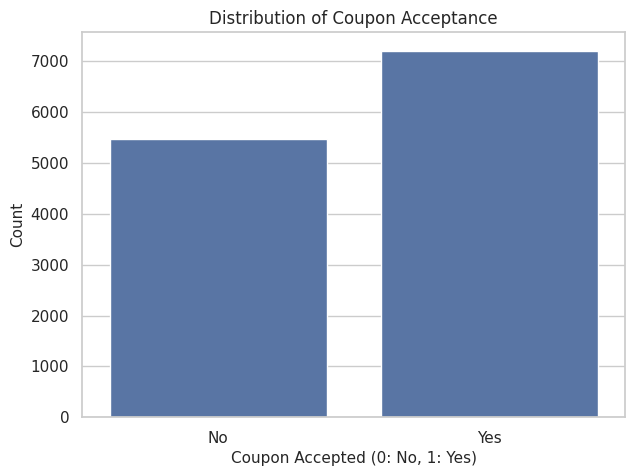

In [43]:
#-------------------------------------------------------------------------------
# 4: Plot the proportion of accepted coupons
#-------------------------------------------------------------------------------

plt.figure(figsize=(7, 5))

sns.countplot(data=data, x='coupon_accepted')
plt.title('Distribution of Coupon Acceptance')
plt.xlabel('Coupon Accepted (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

5. Use a bar plot to visualize the `coupon` column.

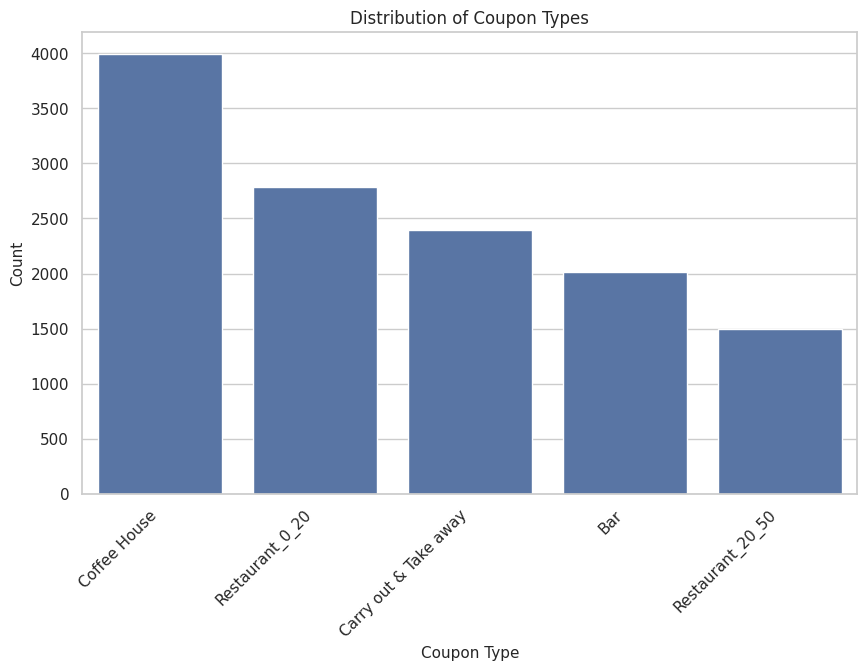

In [44]:
#-------------------------------------------------------------------------------
# 5. Bar plot to visualize coupon column
#
# The bar plot shows the total number of coupons offered for each category
# regarless of whether coupons were accepted or not
#-------------------------------------------------------------------------------

plt.figure(figsize=(10, 6))

coupon_counts = data['coupon'].value_counts()
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()




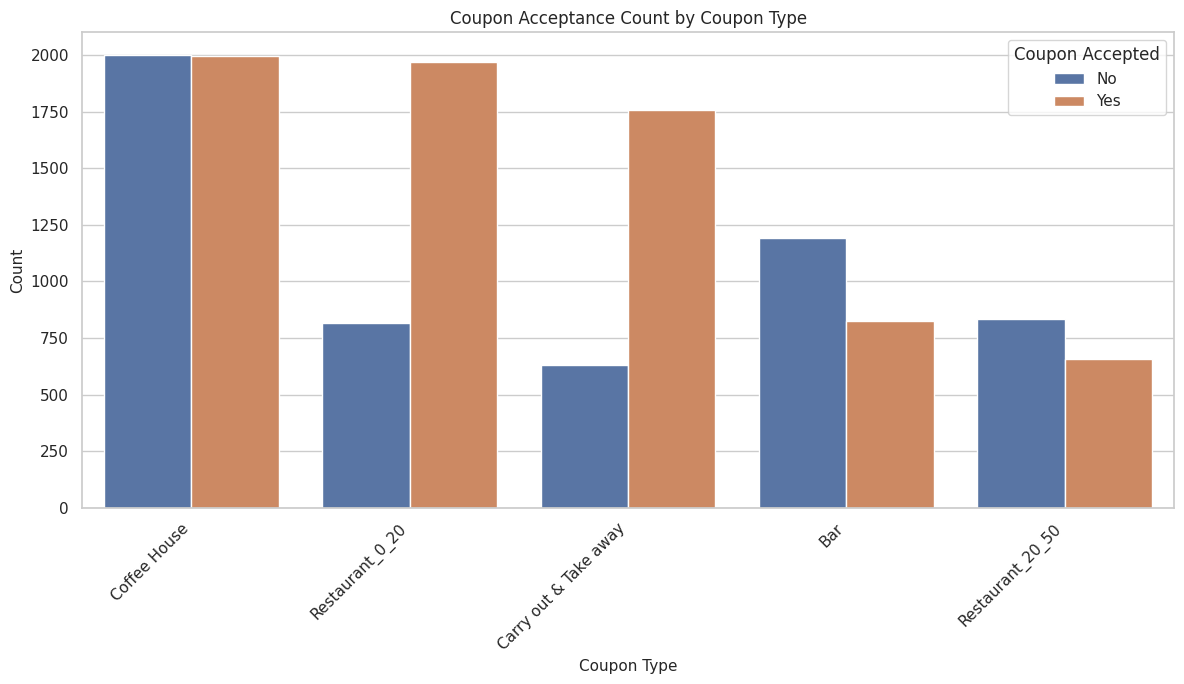

In [45]:
#-------------------------------------------------------------------------------
# 5. Bar plot to visualize coupon column
#
# The bar plot shows the distribution of coupons types with the bars grouped
# by whether the coupon was accepted or not
#-------------------------------------------------------------------------------

plt.figure(figsize=(12, 7))

sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index, hue='coupon_accepted')
plt.title('Coupon Acceptance Count by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

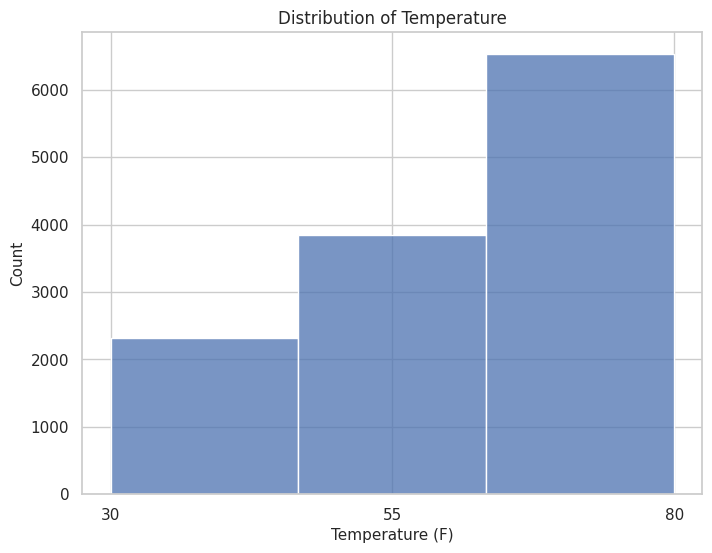

In [46]:
#-------------------------------------------------------------------------------
# 6. Histogram to visualize temperature column
#
# The histogram shows the distribution of temperatures
# This shows the most of the people are travelling at afternoon when the temperate
# has gone up
#-------------------------------------------------------------------------------

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='temperature', bins=3, kde=False)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.xticks(sorted(data['temperature'].unique()))
plt.show()

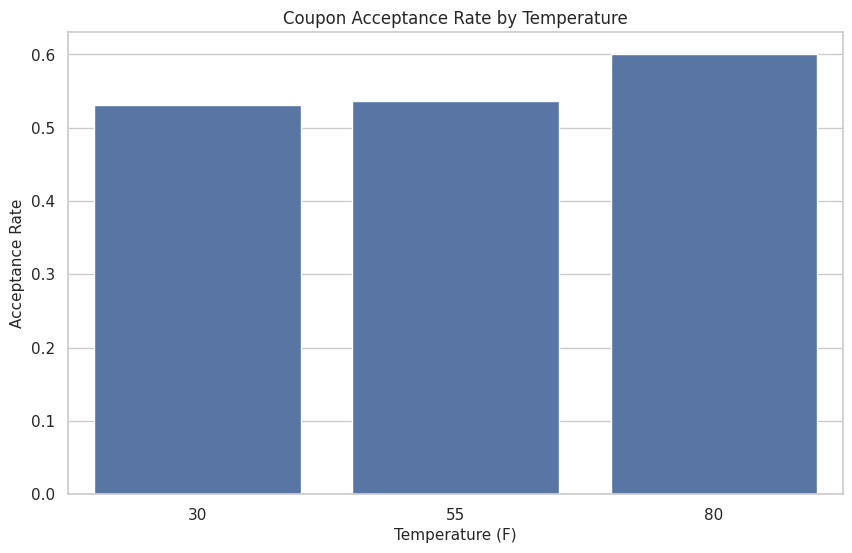

In [47]:
#-------------------------------------------------------------------------------
# 6. Histogram to visualize temperature column
#
# Calculate coupon acceptance rate by temperature
# This shows the acceptance rate is higher when the temperature is higher, or
# acceptance rate is higher during the daytime i.e afternoon
#-------------------------------------------------------------------------------


acceptance_rate_by_temperature = data.groupby('temperature')['coupon_accepted'].mean().reset_index()

# Get the unique temperature values for labels
temp_labels = sorted(data['temperature'].unique())

# Visualize the acceptance rate by temperature
plt.figure(figsize=(10, 6))

sns.barplot(data=acceptance_rate_by_temperature, x='temperature', y='coupon_accepted')
plt.title('Coupon Acceptance Rate by Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Acceptance Rate')
plt.xticks(ticks=acceptance_rate_by_temperature.index, labels=temp_labels)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [48]:
#--------------------------------------------------------------------
# 1. Create a new dataframe that contains just the bar coupons
#--------------------------------------------------------------------

df_bar_coupons = data[data['coupon'] == 'Bar']
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital_status,has_children,education,occupation,income,bar,coffee_house,take_away,restaurant_less_20,restaurant_20_50,to_coupon_5_min,to_coupon_15_min,to_coupon_25_min,same_direction,opposite_direction,coupon_accepted
9,No Urgent Place,Kid,Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend,Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,0,0,4~8,4~8,0,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,0,0,4~8,4~8,0,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [49]:
#--------------------------------------------------------------------
# 2. Bar coupons acceptance rate is 41
#--------------------------------------------------------------------

bar_coupons_acceptance_proportion = df_bar_coupons['coupon_accepted'].mean()

print(f"Proportion of bar coupons accepted: {bar_coupons_acceptance_proportion:.2f}")

Proportion of bar coupons accepted: 0.41


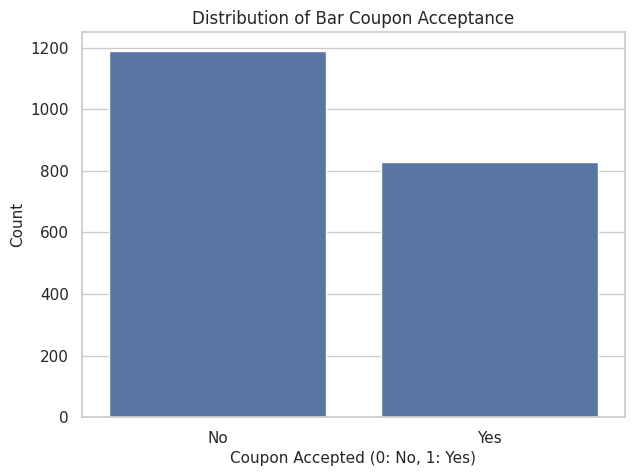

In [50]:
#--------------------------------------------------------------------
# 2. Distribution of Bar Coupon Acceptance with Customer Count
#--------------------------------------------------------------------

plt.figure(figsize=(7, 5))
sns.countplot(data=df_bar_coupons, x='coupon_accepted')
plt.title('Distribution of Bar Coupon Acceptance')
plt.xlabel('Coupon Accepted (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


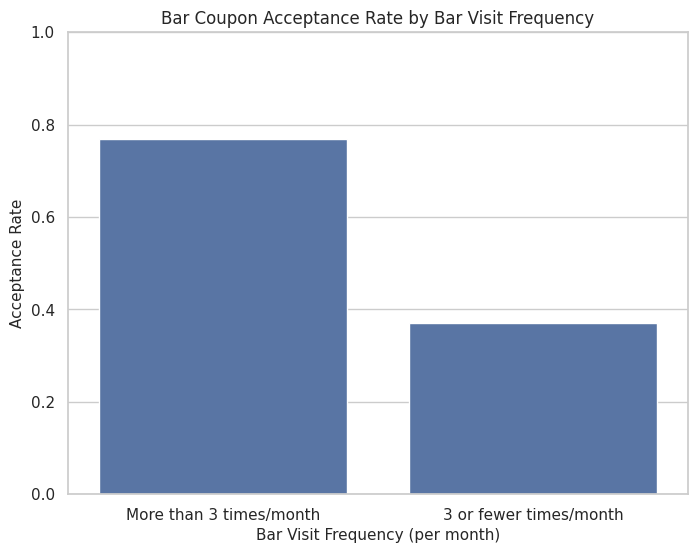

In [51]:
#--------------------------------------------------------------------
# 3. Comparison of acceptance rate between
#    a. Driver visit bar between 0-3 times
#    b. Driver visit bar more than 3 times
#--------------------------------------------------------------------

# Define the groups for bar visit frequency (excluding 'Unknown')
frequent_bar_visitors = df_bar_coupons[df_bar_coupons['bar'].isin(['4~8', '9'])].copy()
infrequent_bar_visitors = df_bar_coupons[df_bar_coupons['bar'].isin(['0', '1~3'])].copy()

# Calculate acceptance rate for each group
acceptance_rate_frequent = frequent_bar_visitors['coupon_accepted'].mean()
acceptance_rate_infrequent = infrequent_bar_visitors['coupon_accepted'].mean()

# Create a DataFrame for plotting
bar_frequency_acceptance = pd.DataFrame({
    'Bar Frequency': ['More than 3 times/month', '3 or fewer times/month'],
    'Acceptance Rate': [acceptance_rate_frequent, acceptance_rate_infrequent]
})

# Draw a barplot
plt.figure(figsize=(8, 6))

sns.barplot(data=bar_frequency_acceptance, x='Bar Frequency', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency (per month)')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers who go to bar > once/month AND are over 25: 0.70
Acceptance rate for all other drivers (bar coupons): 0.34


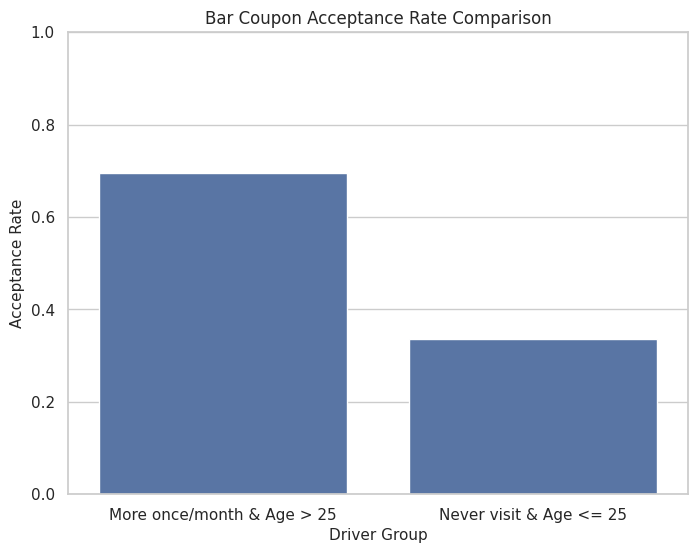

In [52]:
#-------------------------------------------------------------------------------
# 4. Comparison of acceptance rate between
#    a. Driver visit bar more than once a month and are over the age of 25
#    b. Driver never visit bar and are below/equal the age of 25
#-------------------------------------------------------------------------------

# Define the criteria for the target group: go to bar more than once a month AND over 25
more_than_once_a_month = df_bar_coupons['bar'].isin(['1~3', '4~8', '9'])
over_25 = df_bar_coupons['age'] > 25

# Filter the DataFrame to get the target group
target_group = df_bar_coupons[more_than_once_a_month & over_25].copy()

# Filter the DataFrame to get the 'all others' group
# Drivers who never go to a bar and are below/equal 25 satisfy both parts
all_others_group = df_bar_coupons[~(more_than_once_a_month & over_25)].copy()

# Calculate acceptance rate for each group
acceptance_rate_target = target_group['coupon_accepted'].mean()
acceptance_rate_all_others = all_others_group['coupon_accepted'].mean()

print(f"Acceptance rate for drivers who go to bar > once/month AND are over 25: {acceptance_rate_target:.2f}")
print(f"Acceptance rate for all other drivers (bar coupons): {acceptance_rate_all_others:.2f}")

# Create a DataFrame for plotting the comparison
comparison_data = pd.DataFrame({
    'Group': ['More once/month & Age > 25', 'Never visit & Age <= 25'],
    'Acceptance Rate': [acceptance_rate_target, acceptance_rate_all_others]
})

# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_data, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for better comparison of proportions
plt.xticks(rotation=0, ha='center')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate for drivers meeting Prompt 5 criteria: 0.71
Acceptance rate for all other drivers (Prompt 5 comparison): 0.30


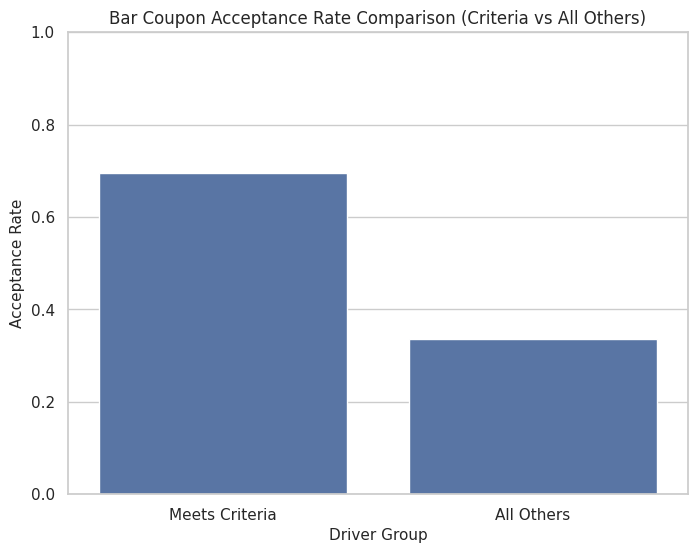

In [53]:
#-------------------------------------------------------------------------------------------------
# 5. Comparison of acceptance rate between
#    a. Driver visit bar more than once a month with adult passengers and are not farmer or fisher
#    b. Driver never visit bar and have kids passengers (or alone) and are farmer or fisher
#-------------------------------------------------------------------------------------------------

# Define the criteria for the target group for Prompt 5
bar_more_than_once = df_bar_coupons['bar'].isin(['1~3', '4~8', '9'])
passenger_not_kid = df_bar_coupons['passanger'] != 'Kid'
occupation_not_farming = df_bar_coupons['occupation'] != 'Farming Fishing & Forestry'

# Filter the DataFrame to get the target group for Prompt 5
target_group = df_bar_coupons[bar_more_than_once & passenger_not_kid & occupation_not_farming].copy()

# Filter the DataFrame to get the 'all others' group for Prompt 5
all_others_group = df_bar_coupons[~(bar_more_than_once & passenger_not_kid & occupation_not_farming)].copy()

# Calculate acceptance rate for each group for Prompt 5
acceptance_rate_target_p5 = target_group['coupon_accepted'].mean()
acceptance_rate_all_others_p5 = all_others_group['coupon_accepted'].mean()

print(f"Acceptance rate for drivers meeting Prompt 5 criteria: {acceptance_rate_target_p5:.2f}")
print(f"Acceptance rate for all other drivers (Prompt 5 comparison): {acceptance_rate_all_others_p5:.2f}")

# Create a DataFrame for plotting the comparison for Prompt 5
comparison_data_p5 = pd.DataFrame({
    'Group': ['Meets Criteria', 'All Others'],
    'Acceptance Rate': [acceptance_rate_target, acceptance_rate_all_others]
})

# Visualize the comparison
plt.figure(figsize=(8, 6))

sns.barplot(data=comparison_data_p5, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison (Criteria vs All Others)')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for better comparison of proportions
plt.xticks(rotation=0, ha='center')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [54]:
#-------------------------------------------------------------------------------------------------
# 6. Comparison of acceptance rate between
#    a. Driver visit bar more than once a month with adult passengers and are not widowed OR
#    b. Driver visit bar more than once a month and are under the age of 30 OR
#    c. Driver visit cheap restaurants more than 4 times a month with income less than $50K
#-------------------------------------------------------------------------------------------------

# Define the criteria for Group 1
bar_more_than_once_g1 = df_bar_coupons['bar'].isin(['1~3', '4~8', '9'])
passenger_not_kid_g1 = df_bar_coupons['passanger'] != 'Kid'
not_widowed_g1 = df_bar_coupons['marital_status'] != 'Widowed'

# Filter the DataFrame to get Group 1
group1 = df_bar_coupons[bar_more_than_once_g1 & passenger_not_kid_g1 & not_widowed_g1].copy()
print(f"Number of drivers in Group 1: {len(group1)}")

# Define the criteria for Group 2
bar_more_than_once_g2 = df_bar_coupons['bar'].isin(['1~3', '4~8', '9'])
under_30_g2 = df_bar_coupons['age'] < 30

# Filter the DataFrame to get Group 2
group2 = df_bar_coupons[bar_more_than_once_g2 & under_30_g2].copy()
print(f"Number of drivers in Group 2: {len(group2)}")

# Define the criteria for Group 3
cheap_restaurants_frequent_g3 = df_bar_coupons['restaurant_less_20'].isin(['4~8', '9'])
income_less_50k_g3 = df_bar_coupons['income'].isin(['$0 - $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

# Filter the DataFrame to get Group 3
group3 = df_bar_coupons[cheap_restaurants_frequent_g3 & income_less_50k_g3].copy()
print(f"Number of drivers in Group 3: {len(group3)}")

# Boolean series
combined_group_condition = (
    (df_bar_coupons['bar'].isin(['1~3', '4~8', '9']) & (df_bar_coupons['passanger'] != 'Kid') & (df_bar_coupons['marital_status'] != 'Widowed')) |
    (df_bar_coupons['bar'].isin(['1~3', '4~8', '9']) & (df_bar_coupons['age'] < 30)) |
    (df_bar_coupons['restaurant_less_20'].isin(['4~8', '9']) & df_bar_coupons['income'].isin(['$0 - $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
)

# Combined group
combined_group = df_bar_coupons[combined_group_condition].copy()
print(f"Number of drivers in the combined group: {len(combined_group)}")

# All others except combined group
all_others_group = df_bar_coupons[~combined_group_condition].copy()
print(f"Number of drivers in the 'All Others' group: {len(all_others_group)}")

Number of drivers in Group 1: 551
Number of drivers in Group 2: 345
Number of drivers in Group 3: 344
Number of drivers in the combined group: 776
Number of drivers in the 'All Others' group: 1241


Acceptance rate for combined group: 0.59
Acceptance rate for 'All Others' group: 0.30


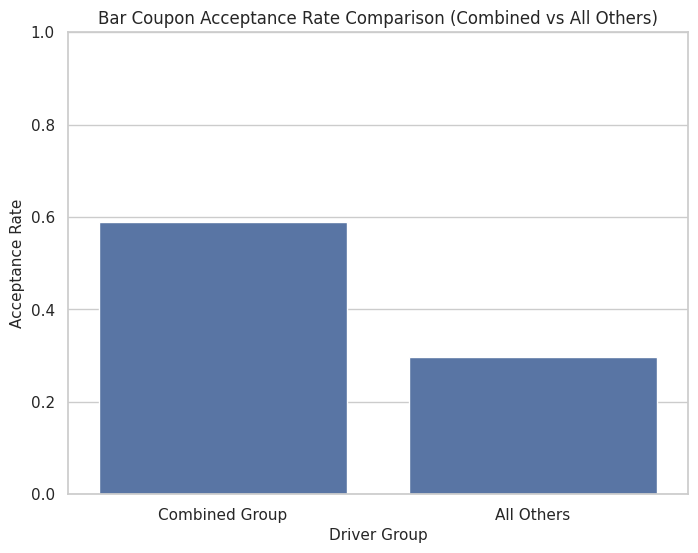

In [55]:
#-------------------------------------------------------------------------------------------------
# 6. Plot the acceptance rate between
#    a. Driver visit bar more than once a month with adult passengers and are not widowed OR
#    b. Driver visit bar more than once a month and are under the age of 30 OR
#    c. Driver visit cheap restaurants more than 4 times a month with income less than $50K
#-------------------------------------------------------------------------------------------------

# Calculate acceptance rate for the combined group
acceptance_rate_combined = combined_group['coupon_accepted'].mean()

# Calculate acceptance rate for the 'All Others' group
acceptance_rate_all_others = all_others_group['coupon_accepted'].mean()

print(f"Acceptance rate for combined group: {acceptance_rate_combined:.2f}")
print(f"Acceptance rate for 'All Others' group: {acceptance_rate_all_others:.2f}")

# Create a DataFrame for plotting the comparison
comparison_data = pd.DataFrame({
    'Group': ['Combined Group', 'All Others'],
    'Acceptance Rate': [acceptance_rate_combined, acceptance_rate_all_others]
})

# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_data, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison (Combined vs All Others)')
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0, ha='center')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## 7) Hypothesis

Synthesize the findings from analysis of bar coupons (Prompts 1 through 6)

**What we observed**
- Overall **acceptance rate** is **41%** for **bar coupons** (from Prompt 2).
- Drivers visiting bar **more than 3 times** have an acceptance rate of **~77%** as compared to drivers visiting bar **3 or less times**, whose acceptance rate is **~37%** (from Prompt 3).
- Drivers visiting bar **more than once** with age **over 25** have a higher acceptance rate of **~70%** compared to the "all others" group at **~34%** (from Prompt 4).
- Drivers visiting bar **more than once** and who do not have **kids** with them and are not **farmers** have a higher acceptance rate of **~71%** compared to the "all others" group at **~30%** (from Prompt 5).
- When considering the combined criteria from Prompt 6 (go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR* go to bars more than once a month and are under the age of 30 *OR* go to cheap restaurants more than 4 times a month and income is less than $50K), the acceptance rate for this **combined group is ~59%**, compared to the 'All Others' group at **~30%**.

**Summary**
- Probability of acceptance coupon is **higher** when:
- Driver visits bar **more than once**
- Driver age is **less than 30** (especially when combined with other factors) or **over 25** (when combined with bar frequency) - *Note: Age has complex interactions as seen in Prompts 4 and 6.*
- Driver travels **without child**
- Driver travels **with spouse only or friend**
- Driver visits **cheap restaurant frequently**
- *Missing bar visit frequency data ('Unknown') was treated as a separate category in the cleaning step.*

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [56]:
#-------------------------------------------------------------------------------------------
# 'Restaurant_0_20' coupon type has a noticeably higher acceptance rate compared to others
# This investigation provides valuable insights into what makes a coupon offer compelling
# to a larger group of people.
#-------------------------------------------------------------------------------------------

# Create a new DataFrame that contains just the Restaurant_0_20 coupons
df_restaurant_0_20_coupons = data[data['coupon'] == 'Restaurant_0_20'].copy()

df_restaurant_0_20_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,marital_status,has_children,education,occupation,income,bar,coffee_house,take_away,restaurant_less_20,restaurant_20_50,to_coupon_5_min,to_coupon_15_min,to_coupon_25_min,same_direction,opposite_direction,coupon_accepted
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant_0_20,1d,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend,Sunny,80,6PM,Restaurant_0_20,2h,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid,Sunny,80,10AM,Restaurant_0_20,2h,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid,Sunny,80,2PM,Restaurant_0_20,1d,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid,Sunny,55,2PM,Restaurant_0_20,1d,Female,21,Unmarried partner,1,Some College,Unemployed,$37500 - $49999,0,0,Unknown,4~8,1~3,1,1,0,0,1,1


In [57]:
#--------------------------------------------------------------------
# New datafram df_restaurant_0_20_coupons info
#--------------------------------------------------------------------
df_restaurant_0_20_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2786 entries, 0 to 12678
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   destination         2786 non-null   object
 1   passanger           2786 non-null   object
 2   weather             2786 non-null   object
 3   temperature         2786 non-null   int64 
 4   time                2786 non-null   object
 5   coupon              2786 non-null   object
 6   expiration          2786 non-null   object
 7   gender              2786 non-null   object
 8   age                 2786 non-null   int64 
 9   marital_status      2786 non-null   object
 10  has_children        2786 non-null   int64 
 11  education           2786 non-null   object
 12  occupation          2786 non-null   object
 13  income              2786 non-null   object
 14  bar                 2786 non-null   object
 15  coffee_house        2786 non-null   object
 16  take_away           2786 non

In [58]:
#--------------------------------------------------------------------
# New datafram df_restaurant_0_20_coupons description
#--------------------------------------------------------------------

df_restaurant_0_20_coupons.describe()

,temperature,age,has_children,to_coupon_5_min,to_coupon_15_min,to_coupon_25_min,same_direction,opposite_direction,coupon_accepted
count,2786.000000,2786.000000,2786.000000,2786.0,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000
mean,64.215721,32.468772,0.412778,1.0,0.447236,0.111271,0.180187,0.819813,0.707107
std,19.785759,10.422455,0.492422,0.0,0.497297,0.314523,0.384412,0.384412,0.455171
min,30.000000,20.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,22.250000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,41.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,51.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#--------------------------------------------------------------------
# Restaurant_0_20 coupons acceptance rate is 71
#--------------------------------------------------------------------

restaurant_coupons_acceptance_proportion = df_restaurant_0_20_coupons['coupon_accepted'].mean()

print(f"Number of acceptance for Restaurant(<20) coupons: {len(df_restaurant_0_20_coupons)}")
print(f"Proportion of Restaurant coupons accepted: {restaurant_coupons_acceptance_proportion:.2f}")

Number of acceptance for Restaurant(<20) coupons: 2786
Proportion of Restaurant coupons accepted: 0.71


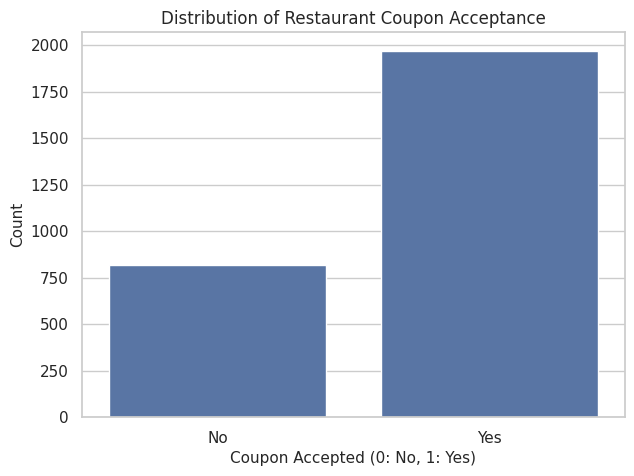

In [60]:
#--------------------------------------------------------------------
# Distribution of Restaurant Coupon Acceptance with Customer Count
#--------------------------------------------------------------------

plt.figure(figsize=(7, 5))
sns.countplot(data=df_restaurant_0_20_coupons, x='coupon_accepted')
plt.title('Distribution of Restaurant Coupon Acceptance')
plt.xlabel('Coupon Accepted (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

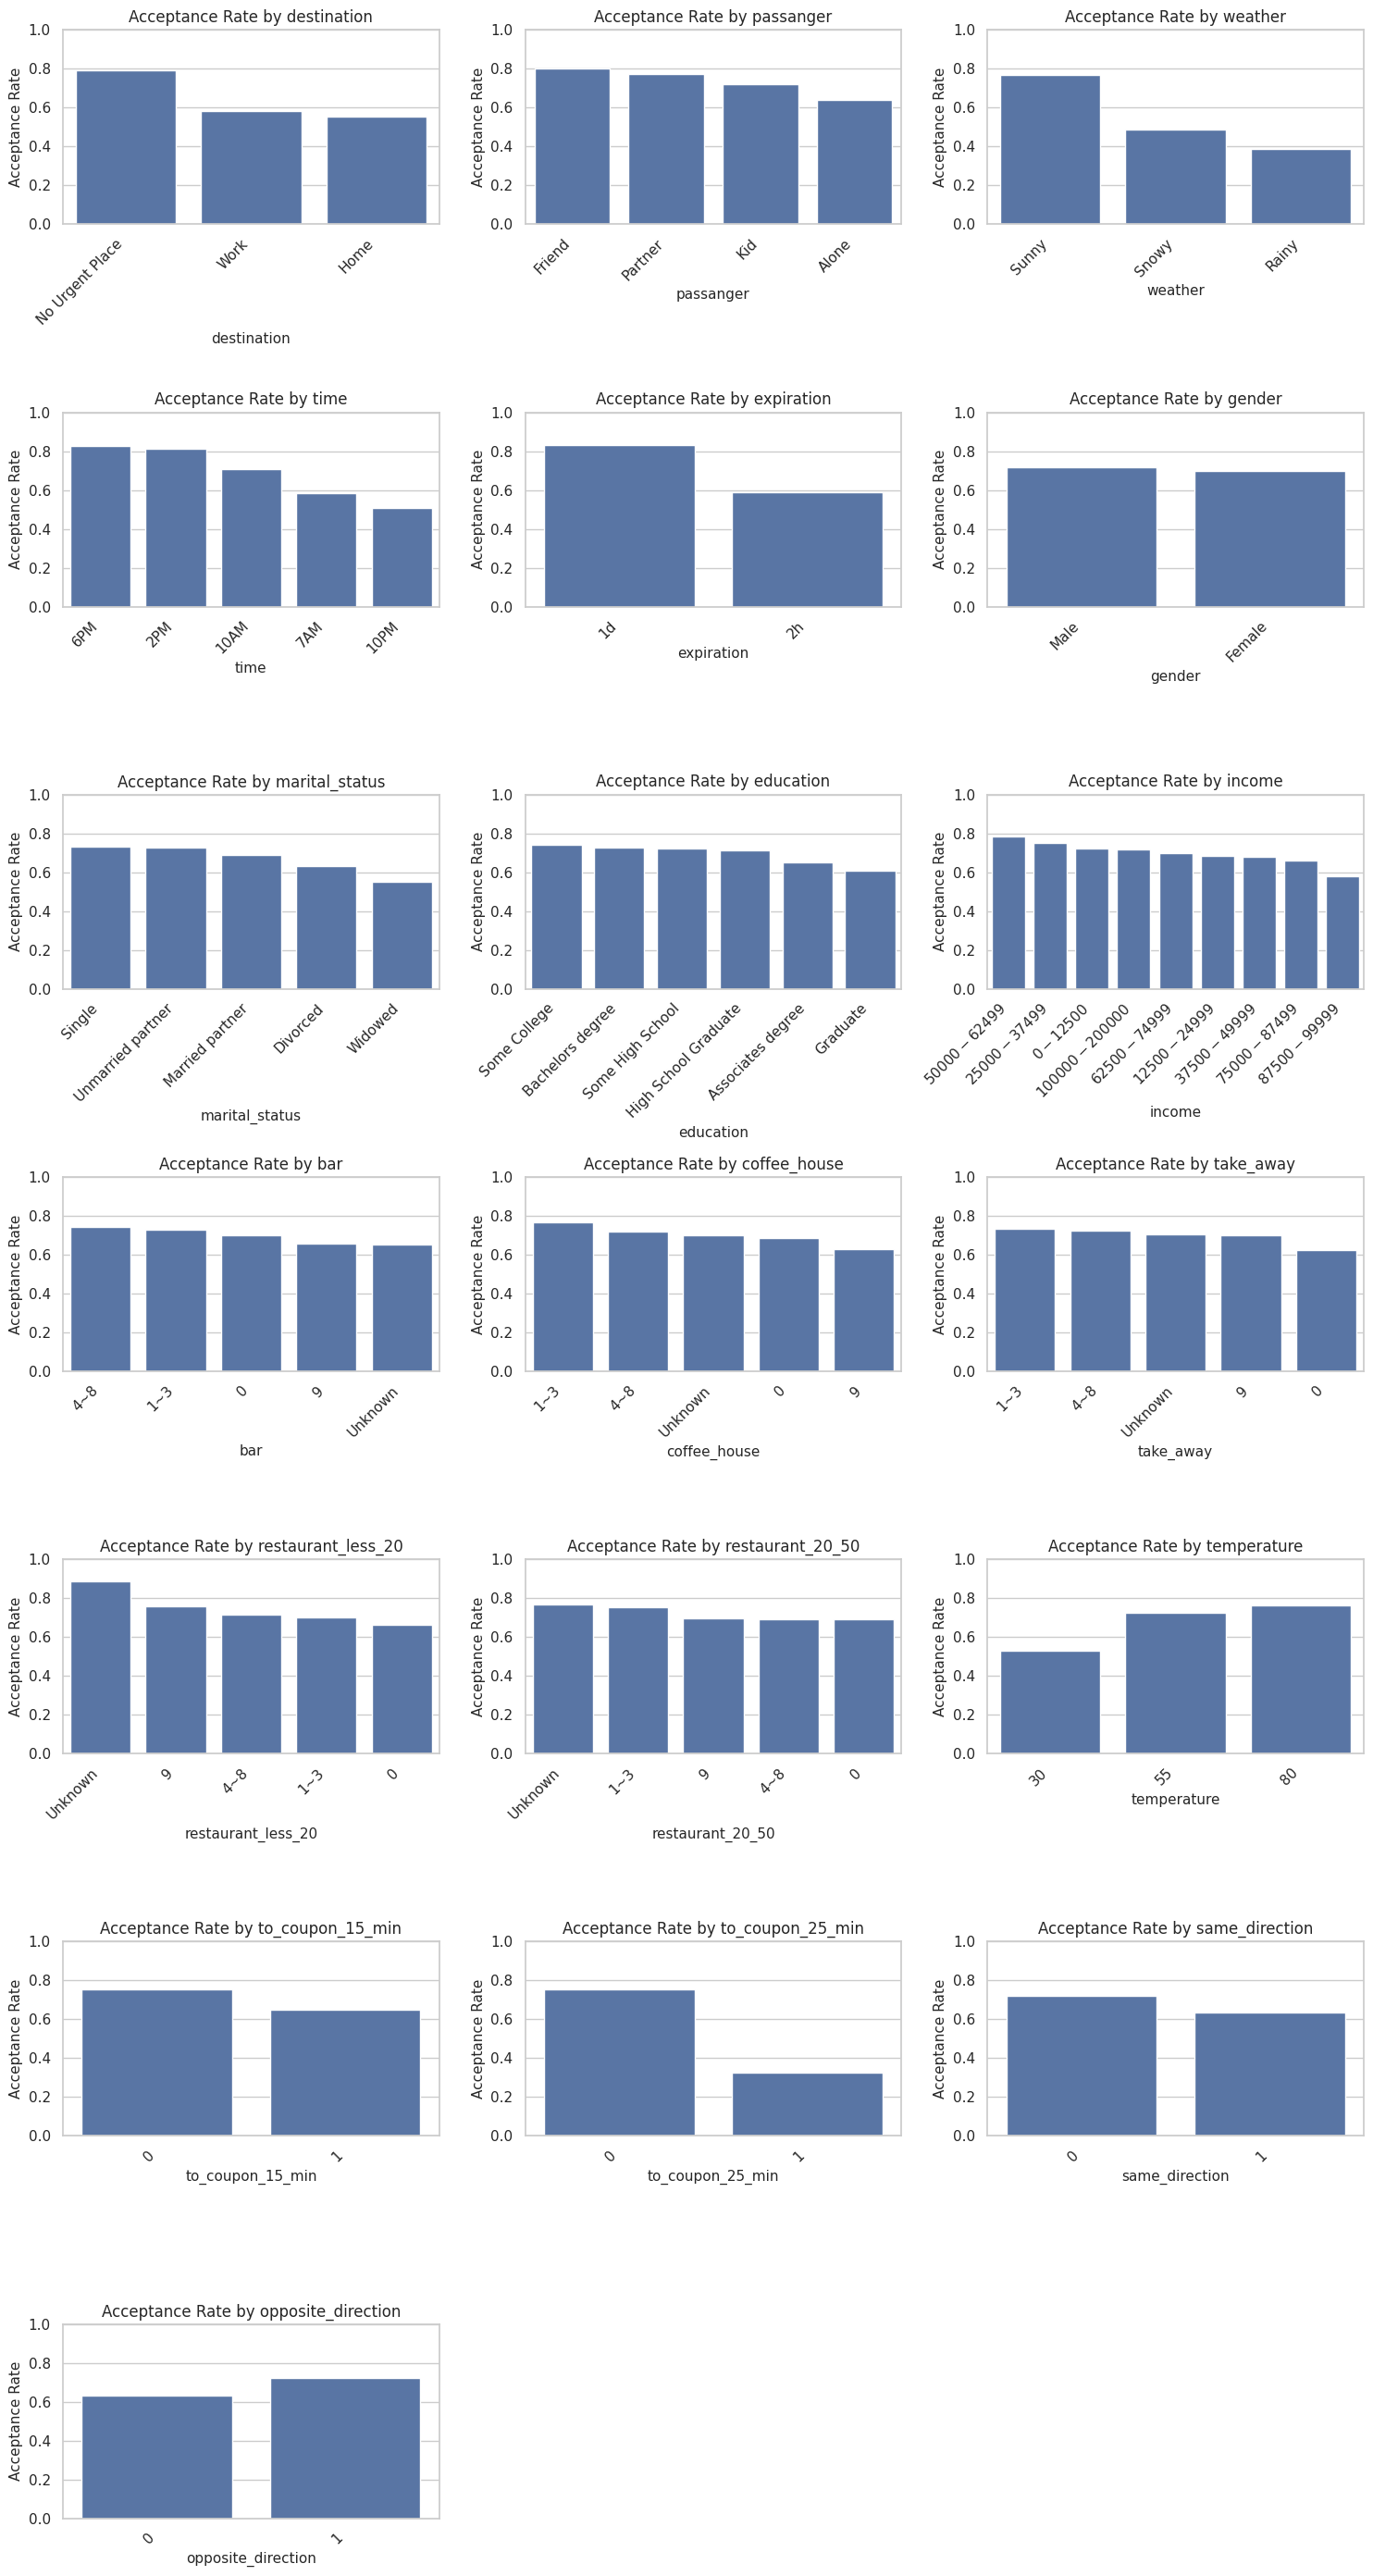

In [61]:
#---------------------------------------------------------------------
# Analyze categorical feature how it helps for higher acceptance rate
#---------------------------------------------------------------------

# Identify categorical columns
categorical_cols = df_restaurant_0_20_coupons.select_dtypes(include='object').columns.tolist()

# Exclude the 'coupon' column as it is the same for this DataFrame
categorical_cols.remove('coupon')
# Exclude the 'occupation' since it has many values so adds complexity
categorical_cols.remove('occupation')

# Add the distance and direction columns which are numerical but act as categories
categorical_cols.extend(['temperature', 'to_coupon_15_min', 'to_coupon_25_min', 'same_direction', 'opposite_direction'])


# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    # Calculate the mean acceptance rate for each category
    acceptance_rate_by_category = df_restaurant_0_20_coupons.groupby(col)['coupon_accepted'].mean().reset_index()

    # Sort the categories by acceptance rate for better visualization
    acceptance_rate_by_category = acceptance_rate_by_category.sort_values(by='coupon_accepted', ascending=False)

    # Create a bar plot for the acceptance rate by category
    sns.barplot(data=acceptance_rate_by_category, x=col, y='coupon_accepted')
    plt.title(f'Acceptance Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Acceptance Rate')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1475826591.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rate_by_age_bin = df_restaurant_0_20_coupons.groupby('_age_binned')['coupon_accepted'].mean().reset_index()


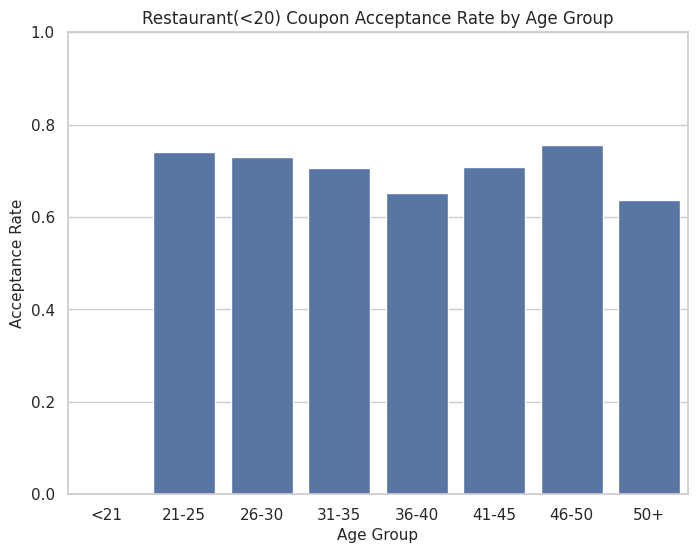

In [62]:
#---------------------------------------------------------------------
# Analyze numerical feature
# Age has many unique values, creating bins for age groups
#---------------------------------------------------------------------

plt.figure(figsize=(8, 6))

# Convert age column to numeric and drop NaN
df_restaurant_0_20_coupons['age'] = pd.to_numeric(df_restaurant_0_20_coupons['age'], errors='coerce')
df_restaurant_0_20_coupons.dropna(subset=['age'], inplace=True)

# Bin age into appropriate groups
bins = [0, 20, 25, 30, 35, 40, 45, 50, np.inf]
labels = ['<21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50+']
df_restaurant_0_20_coupons['_age_binned'] = pd.cut(df_restaurant_0_20_coupons['age'], bins=bins, labels=labels, right=False)

acceptance_rate_by_age_bin = df_restaurant_0_20_coupons.groupby('_age_binned')['coupon_accepted'].mean().reset_index()
acceptance_rate_by_age_bin = acceptance_rate_by_age_bin.sort_values(by='coupon_accepted', ascending=False)

sns.barplot(data=acceptance_rate_by_age_bin, x='_age_binned', y='coupon_accepted')
plt.title('Restaurant(<20) Coupon Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

plt.show()

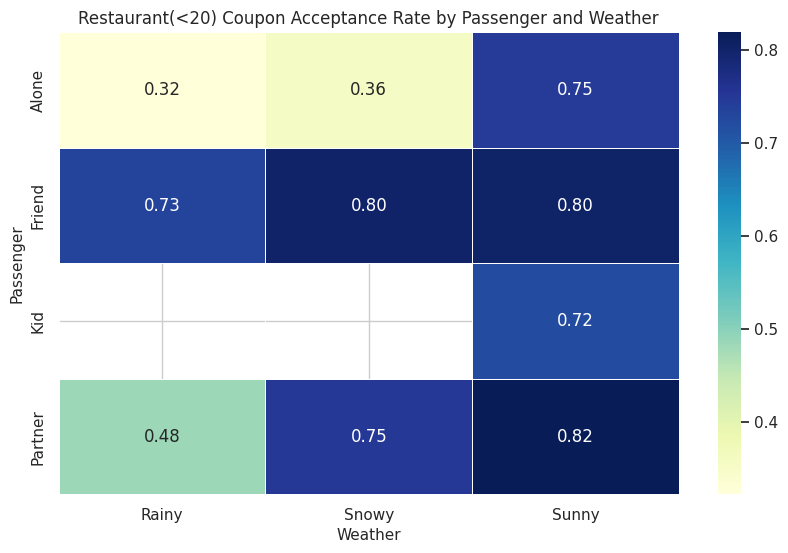

In [63]:
#-------------------------------------------------------------------------------------------------
# Combine passanger and weather features and observe interaction between them
#-------------------------------------------------------------------------------------------------

acceptance_rate_interaction = df_restaurant_0_20_coupons.groupby(['passanger', 'weather'])['coupon_accepted'].mean().unstack()

# Heatmap for the acceptance_rate_interaction
plt.figure(figsize=(10, 6))

sns.heatmap(acceptance_rate_interaction, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Restaurant(<20) Coupon Acceptance Rate by Passenger and Weather')
plt.xlabel('Weather')
plt.ylabel('Passenger')
plt.show()

/tmp/ipython-input-4204646552.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rate_age_time_plot = df_restaurant_0_20_coupons.groupby(['_age_binned', 'time'])['coupon_accepted'].mean().reset_index()


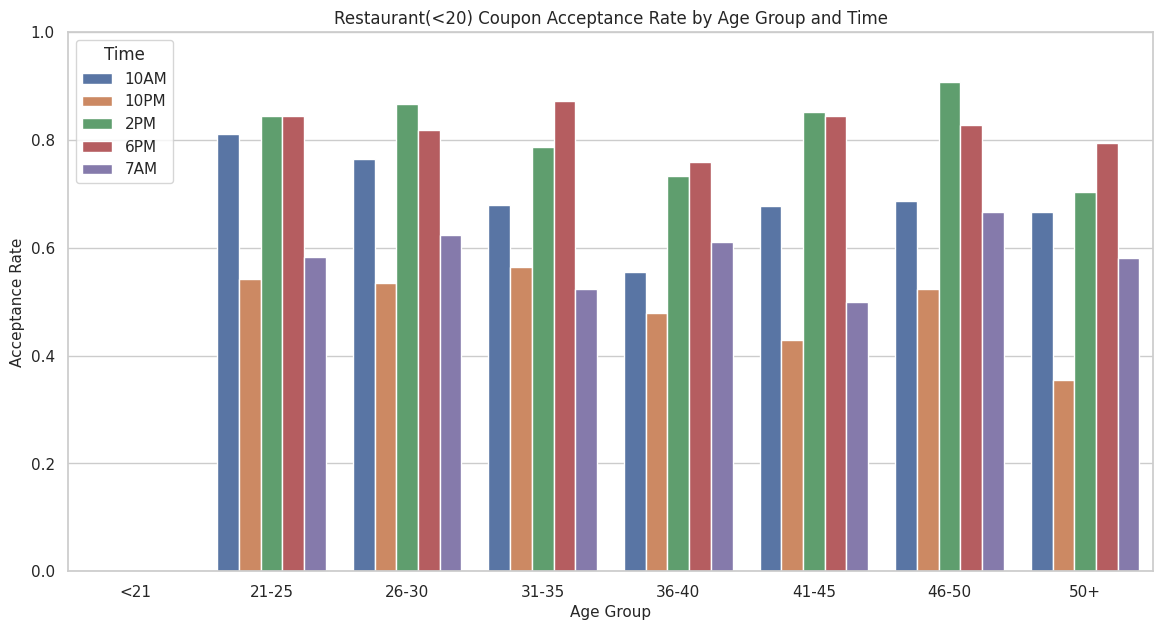

In [64]:
#-------------------------------------------------------------------------------------------------
# Combine age and time features and observe interaction between them
#-------------------------------------------------------------------------------------------------

# Ensure 'age' column is numeric before binning
df_restaurant_0_20_coupons['age'] = pd.to_numeric(df_restaurant_0_20_coupons['age'], errors='coerce')
# Drop rows where age is NaN after coercion
df_restaurant_0_20_coupons.dropna(subset=['age'], inplace=True)

# Bin age into appropriate groups
bins = [0, 20, 25, 30, 35, 40, 45, 50, np.inf]
labels = ['<21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50+']
df_restaurant_0_20_coupons['_age_binned'] = pd.cut(df_restaurant_0_20_coupons['age'], bins=bins, labels=labels, right=False)

# Calculate acceptance rate by binned age and time for plotting
acceptance_rate_age_time_plot = df_restaurant_0_20_coupons.groupby(['_age_binned', 'time'])['coupon_accepted'].mean().reset_index()

# Visualize the interaction with a grouped bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=acceptance_rate_age_time_plot, x='_age_binned', y='coupon_accepted', hue='time')
plt.title('Restaurant(<20) Coupon Acceptance Rate by Age Group and Time')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.legend(title='Time')
plt.show()

# Drop the temporary binned column after analysis and plotting
df_restaurant_0_20_coupons = df_restaurant_0_20_coupons.drop('_age_binned', axis=1)

## Summary

### Data Analysis Key Findings for Restaurant (<$20) Coupons

Based on the analysis of the `Restaurant_0_20` coupon data, the following features appear to have a significant influence on coupon acceptance rate:

*   **Destination:** Acceptance rate is highest when the destination is 'No Urgent Place' (~79%), compared to 'Home' (~56%) or 'Work' (~58%).
*   **Passenger:** Acceptance rate is highest when the passenger is a 'Friend' (~80%), followed by 'Partner' (~77%), 'Kid' (~72%), and lowest when 'Alone' (~64%).
*   **Weather:** Acceptance rate is significantly higher in 'Sunny' weather (~77%) compared to 'Snowy' (~49%) or 'Rainy' (~39%).
*   **Time:** Acceptance rate is highest at '2PM' (~81%) and '6PM' (~83%).
*   **Expiration:** Coupons with a '1d' expiration (~83%) have a higher acceptance rate than those with a '2h' expiration (~59%).
*   **Age:** Acceptance rate is generally higher for younger age groups, particularly '21-25' (~74%) and '26-30' (~73%). The acceptance rate tends to be lower for older age groups, especially '50+' (~64%).
*   **Income:** Acceptance rate varies across income levels, with some brackets showing slightly higher rates (e.g., '$50000 - $62499' at ~78%, '$25000 - $37499' at ~75%).
*   **Frequency of Visiting Restaurants (<$20):** Counterintuitively, those who dine at restaurants in this price range '4~8' times a month have the highest acceptance rate (~72%). Acceptance is also relatively high for those who dine '9' or more times (~76%).
*   **Distance to Coupon:** Acceptance rate is significantly higher when the coupon is within 'to_coupon_25_min' = 0 (~75%) compared to 1 (~33%). Acceptance is also higher when 'to_coupon_15_min' = 0 (~75%) compared to 1 (~65%).
*   **Direction to Coupon:** Acceptance rate is higher when the destination is in the 'Opposite Direction' (~72%) compared to the 'Same Direction' (~63%).

### Feature Interactions:

Exploring combinations of features revealed further nuances in coupon acceptance:

*   **Passenger and Weather:** The acceptance rate for passengers with 'Friend' or 'Partner' is notably higher in 'Sunny' weather compared to 'Rainy' or 'Snowy'. For example, the acceptance rate is around 80% for 'Friend' or 'Partner' in 'Sunny' weather, but significantly lower in adverse weather. This suggests that good weather and having company amplify the likelihood of accepting a restaurant coupon.
*   **Age and Time:** The grouped bar plot for age and time indicates that certain age groups have particularly high acceptance rates at specific times. For instance, younger age groups (like 21-25 and 26-30) show very high acceptance rates at '2PM' and '6PM'. This suggests that the time of day interacts with age to influence the propensity to accept a coupon, possibly related to daily schedules or dining habits of different age groups.

### Characteristics of Customers Likely to Accept Restaurant (<$20) Coupons:

Based on these findings, customers are more likely to accept Restaurant (<$20) coupons if they are:

*   At a **'No Urgent Place'** destination.
*   With a **'Friend'** or **'Partner'** as a passenger, **especially in Sunny weather**.
*   In **'Sunny'** weather.
*   Receiving the coupon around **'2PM' or '6PM'**, **particularly if they are in younger age groups (21-30)**.
*   Offered a coupon with a **'1d' expiration**.
*   In **younger age groups**, particularly **21-30**.
*   In certain **middle-income brackets** (e.g., $25k to $75k).
*   Already dine at **Restaurant (<$20)** or **Restaurant (20-50)** restaurants moderately to frequently.
*   The coupon location is **closer** (especially within 25 minutes).
*   The coupon is in the **'Opposite Direction'** of their destination.

### Insights and Next Steps:

*   Targeting coupon distribution based on **time of day, weather, and passenger type**, and considering their **interactions**, could significantly increase acceptance rates.
*   Focusing on **younger demographics** and those with **certain income levels** may yield higher acceptance.
*   The influence of **distance and direction** suggests that proximity and convenience are important factors.
*   Further investigation could explore other feature interactions to identify even more specific high-acceptance customer segments.
*   Compare these findings to the analysis of other coupon types (like Bar coupons) to understand the unique factors influencing acceptance for different businesses.